In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# File path to listings.csv
dlistings_csv_path = "Data Files for AirBnB Project/detail listings.csv"

#read listings.csv into a database
dlistings_df = pd.read_csv(dlistings_csv_path)
dlistings_df.head()
#len(dlistings_df)

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3362,https://www.airbnb.com/rooms/3362,20190211014849,2019-02-11,"Convention Center Rowhouse & In Law: 2 Units, 4BR",An architect-designed rowhouse featuring a lar...,This listing features our 19th century Victori...,An architect-designed rowhouse featuring a lar...,none,NaN,...,t,f,strict_14_with_grace_period,f,f,5,5,0,0,1.27
1,3662,https://www.airbnb.com/rooms/3662,20190211014849,2019-02-11,Vita's Hideaway II,IMPORTANT NOTES * Carefully read and be sure t...,IMPORTANT NOTES * Airbnb keeps accurate track ...,IMPORTANT NOTES * Carefully read and be sure t...,none,We love that our neighborhood is up and coming...,...,f,f,moderate,f,f,3,0,3,0,0.37
2,3686,https://www.airbnb.com/rooms/3686,20190211014849,2019-02-11,Vita's Hideaway,IMPORTANT NOTES * Carefully read and be sure t...,IMPORTANT NOTES * Airbnb keeps accurate track ...,IMPORTANT NOTES * Carefully read and be sure t...,none,We love that our neighborhood is up and coming...,...,f,f,moderate,f,f,3,0,3,0,0.67
3,3771,https://www.airbnb.com/rooms/3771,20190211014849,2019-02-11,Mt. Pleasant,"Clean, convenient and welcoming home. Bedroom...","Spacious, clean, convenient and welcoming home...","Clean, convenient and welcoming home. Bedroom...",none,NaN,...,f,f,moderate,f,f,1,0,1,0,0.01
4,4002,https://www.airbnb.com/rooms/4002,20190211014849,2019-02-11,2 Bedroom Private Condo Suite (Basement Apt),This is a very large beautiful English BASEMEN...,This is a very large (1400 SQ feet) beautiful ...,This is a very large beautiful English BASEMEN...,none,This is a very quite neighborhood.,...,t,f,flexible,f,t,1,1,0,0,1.22


In [3]:
###  only necessary columns
dlistings_df = dlistings_df[["id", "neighbourhood_cleansed", "zipcode", "latitude", "longitude", "property_type", "room_type", "price",  
                            "review_scores_rating", "reviews_per_month"]]
dlistings_df.rename(columns={'neighbourhood_cleansed': 'neighbourhood'}, inplace=True)
dlistings_df.head()

,id,neighbourhood,zipcode,latitude,longitude,property_type,room_type,price,review_scores_rating,reviews_per_month
0,3362,"Shaw, Logan Circle",20001,38.910461,-77.019331,Townhouse,Entire home/apt,$433.00,96.0,1.27
1,3662,Historic Anacostia,20020,38.861925,-76.989634,House,Private room,$65.00,94.0,0.37
2,3686,Historic Anacostia,20020,38.863138,-76.988362,House,Private room,$55.00,91.0,0.67
3,3771,"Columbia Heights, Mt. Pleasant, Pleasant Plain...",20009,38.927605,-77.039265,Other,Private room,$88.00,NaN,0.01
4,4002,"North Michigan Park, Michigan Park, University...",20017,38.940084,-76.989360,House,Entire home/apt,$120.00,85.0,1.22


In [4]:
###  filter by room_type='entire house'
nothouse = dlistings_df[dlistings_df["room_type"] != "Entire home/apt" ].index
 
# Delete these row indexes from dataFrame
dlistings_df.drop(nothouse , inplace=True)

dlistings_df.head()

,id,neighbourhood,zipcode,latitude,longitude,property_type,room_type,price,review_scores_rating,reviews_per_month
0,3362,"Shaw, Logan Circle",20001,38.910461,-77.019331,Townhouse,Entire home/apt,$433.00,96.0,1.27
4,4002,"North Michigan Park, Michigan Park, University...",20017,38.940084,-76.989360,House,Entire home/apt,$120.00,85.0,1.22
6,4283,"Kalorama Heights, Adams Morgan, Lanier Heights",20009,38.922032,-77.044474,Apartment,Entire home/apt,$135.00,100.0,0.12
10,5589,"Kalorama Heights, Adams Morgan, Lanier Heights",20009,38.919327,-77.041238,Apartment,Entire home/apt,$118.00,90.0,0.70
15,9641,"Dupont Circle, Connecticut Avenue/K Street",20005,38.911465,-77.036361,Loft,Entire home/apt,$195.00,95.0,1.23


In [5]:
###  Convert the price column from string to float  ###
#remove the $'s'
dlistings_df['price'] = [x.replace("$", "") for x in dlistings_df["price"]]
#remove the ,'s'
dlistings_df['price'] = [x.replace(",", "") for x in dlistings_df["price"]]
#convert to 
dlistings_df['price'] = dlistings_df['price'].astype(float)
dlistings_df.head()

,id,neighbourhood,zipcode,latitude,longitude,property_type,room_type,price,review_scores_rating,reviews_per_month
0,3362,"Shaw, Logan Circle",20001,38.910461,-77.019331,Townhouse,Entire home/apt,433.0,96.0,1.27
4,4002,"North Michigan Park, Michigan Park, University...",20017,38.940084,-76.989360,House,Entire home/apt,120.0,85.0,1.22
6,4283,"Kalorama Heights, Adams Morgan, Lanier Heights",20009,38.922032,-77.044474,Apartment,Entire home/apt,135.0,100.0,0.12
10,5589,"Kalorama Heights, Adams Morgan, Lanier Heights",20009,38.919327,-77.041238,Apartment,Entire home/apt,118.0,90.0,0.70
15,9641,"Dupont Circle, Connecticut Avenue/K Street",20005,38.911465,-77.036361,Loft,Entire home/apt,195.0,95.0,1.23


In [6]:
#create a table finding the max, min and median price for each neighborhood
prcbyhood_dfg = dlistings_df.groupby(["neighbourhood", "room_type"]).agg({"price":["max","min","median", "mean"]})
#remove the 'price' level
prcbyhood_dfg.columns = prcbyhood_dfg.columns.droplevel()

prcbyhood_dfg.rename(columns={'max':'max rent', 'min':'min rent', 'median':'median rent', 'mean':'mean rent'}, inplace=True)
#reset index to remove mult-index
prcbyhood_dfg = prcbyhood_dfg.rename_axis(['neighbourhood', 'Room_type']).reset_index()

prcbyhood_dfg.head()

,neighbourhood,Room_type,max rent,min rent,median rent,mean rent
0,"Brightwood Park, Crestwood, Petworth",Entire home/apt,2500.0,35.0,100.0,180.629139
1,"Brookland, Brentwood, Langdon",Entire home/apt,1638.0,42.0,91.5,174.714286
2,"Capitol Hill, Lincoln Park",Entire home/apt,5995.0,50.0,150.0,264.990783
3,"Capitol View, Marshall Heights, Benning Heights",Entire home/apt,450.0,30.0,99.0,132.052632
4,"Cathedral Heights, McLean Gardens, Glover Park",Entire home/apt,1500.0,50.0,115.0,272.604938


In [7]:
#create a table finding the max, min and median price for each neighborhood
ratebyhood_dfg = dlistings_df.groupby(["neighbourhood", "room_type"]).agg({"review_scores_rating":"mean", "reviews_per_month":"mean",
                                                                           "id":"count"})

ratebyhood_dfg.rename(columns={'review_scores_rating':'avg rating', 'reviews_per_month':'avg # reviews / month', 'id':'# of properties'}, inplace=True)
#reset index to remove mult-index
ratebyhood_dfg = ratebyhood_dfg.rename_axis(['neighbourhood', 'Room_type']).reset_index()

ratebyhood_dfg.head()

,neighbourhood,Room_type,avg rating,avg # reviews / month,# of properties
0,"Brightwood Park, Crestwood, Petworth",Entire home/apt,95.586873,2.023436,302
1,"Brookland, Brentwood, Langdon",Entire home/apt,95.783784,2.369865,84
2,"Capitol Hill, Lincoln Park",Entire home/apt,96.608939,2.156451,651
3,"Capitol View, Marshall Heights, Benning Heights",Entire home/apt,94.333333,2.354667,19
4,"Cathedral Heights, McLean Gardens, Glover Park",Entire home/apt,96.176471,1.384630,81


In [8]:
###  merge the 2 dataframes

byhood_df = pd.merge(prcbyhood_dfg, ratebyhood_dfg, on=['neighbourhood'])
del byhood_df["Room_type_y"]
byhood_df.rename(columns={'Room_type_x':'Room_type'}, inplace=True)
#byhood_df.sort_values(by=['median rent'], ascending=False)
byhood_df.head()

,neighbourhood,Room_type,max rent,min rent,median rent,mean rent,avg rating,avg # reviews / month,# of properties
0,"Brightwood Park, Crestwood, Petworth",Entire home/apt,2500.0,35.0,100.0,180.629139,95.586873,2.023436,302
1,"Brookland, Brentwood, Langdon",Entire home/apt,1638.0,42.0,91.5,174.714286,95.783784,2.369865,84
2,"Capitol Hill, Lincoln Park",Entire home/apt,5995.0,50.0,150.0,264.990783,96.608939,2.156451,651
3,"Capitol View, Marshall Heights, Benning Heights",Entire home/apt,450.0,30.0,99.0,132.052632,94.333333,2.354667,19
4,"Cathedral Heights, McLean Gardens, Glover Park",Entire home/apt,1500.0,50.0,115.0,272.604938,96.176471,1.384630,81


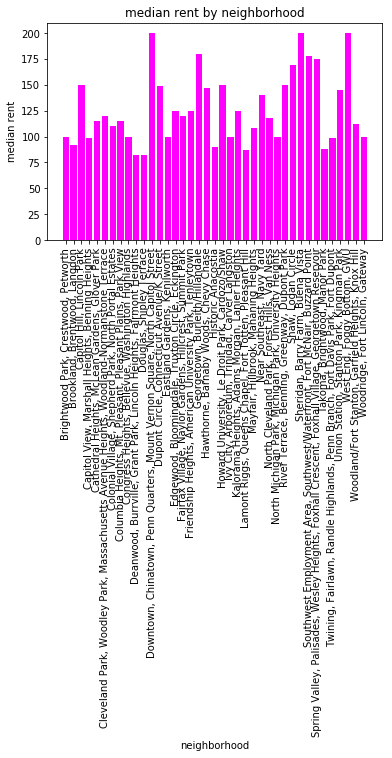

[30, 5]

In [9]:
###  Plot neighborhood v median rent  ###

plt.bar(byhood_df['neighbourhood'], byhood_df["median rent"], color = 'magenta')

plt.ylabel('median rent')
plt.xlabel('neighborhood')
plt.title('median rent by neighborhood')

plt.xticks(rotation='vertical')

# Get current size
fig_size = plt.rcParams["figure.figsize"]
 

#increase plot size horizontally by 8
fig_size[0] = 30
fig_size[1] = 5

plt.savefig("MedianPriceByHood.png")

plt.show()
fig_size


In [10]:
byhood_df.head()

,neighbourhood,Room_type,max rent,min rent,median rent,mean rent,avg rating,avg # reviews / month,# of properties
0,"Brightwood Park, Crestwood, Petworth",Entire home/apt,2500.0,35.0,100.0,180.629139,95.586873,2.023436,302
1,"Brookland, Brentwood, Langdon",Entire home/apt,1638.0,42.0,91.5,174.714286,95.783784,2.369865,84
2,"Capitol Hill, Lincoln Park",Entire home/apt,5995.0,50.0,150.0,264.990783,96.608939,2.156451,651
3,"Capitol View, Marshall Heights, Benning Heights",Entire home/apt,450.0,30.0,99.0,132.052632,94.333333,2.354667,19
4,"Cathedral Heights, McLean Gardens, Glover Park",Entire home/apt,1500.0,50.0,115.0,272.604938,96.176471,1.384630,81


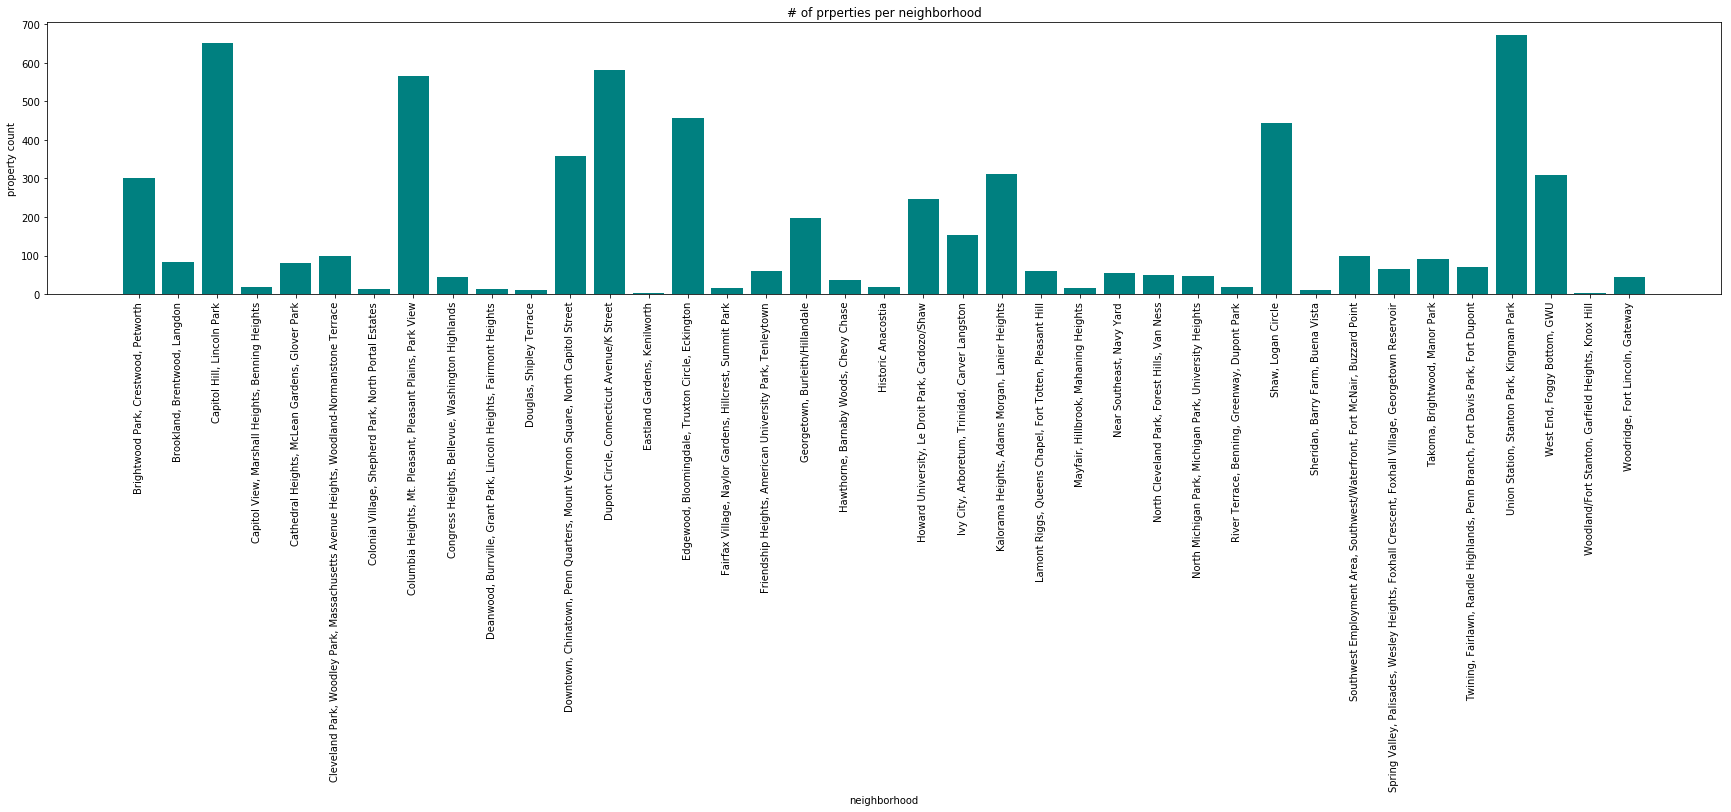

[30, 5]

In [11]:

###  Plot neighborhood v median rent  ###

plt.bar(byhood_df['neighbourhood'], byhood_df["# of properties"], color = 'teal')

plt.ylabel('property count')
plt.xlabel('neighborhood')
plt.title('# of prperties per neighborhood')

plt.xticks(rotation='vertical')

# Get current size
fig_size = plt.rcParams["figure.figsize"]
 

#increase plot size horizontally by 8
fig_size[0] = 30
fig_size[1] = 5

plt.savefig("propertyCntByHood.png")

plt.show()
fig_size
